In [1]:
%load_ext autoreload
%autoreload 1
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import mplhep as hep

%aimport longitudinalProfile.camel.driver
%aimport longitudinalProfile.camel.plot
from longitudinalProfile.camel.driver import CamelFinderDriver

In [2]:
plotEnergySettings = [[20, 30], [50], [80, 100, 120], [250]]

In [3]:
driver_data = CamelFinderDriver("data", "cmssw", "v40")
driver_data.makeAll()

Finding peaks:   0%|          | 0/272855 [00:00<?, ?it/s]

Peak finding efficiency : 48.5%
FilterLowBaseHeight - efficiency 23.9%
FilterNoisyCellsPeaksUsingBases - efficiency 94.9%
FilterDipsNotInCenter - efficiency 99.9%


In [4]:
driver_sim = CamelFinderDriver("sim_proton_v46_patchMIP", "cmssw", "v40")
driver_sim.makeAll()

Finding peaks:   0%|          | 0/359937 [00:00<?, ?it/s]

Peak finding efficiency : 46.0%
FilterLowBaseHeight - efficiency 21.1%
FilterNoisyCellsPeaksUsingBases - efficiency 97.3%
FilterDipsNotInCenter - efficiency 99.9%


In [5]:
driver_sim.peaks_df_mostProminent

,ntupleNumber,event,beamEnergy,rechits_energy_maxLayer,peak_index,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips
eventInternal,,,,,,,,,,,,
10,0,5125,100.0,11.676872,11.0,1.884112,6.0,12.0,2.147200,-6.363690,9.552800,11.700000
42,0,5414,100.0,7.038614,11.0,1.155020,6.0,15.0,5.548542,-5.278245,8.983404,14.531946
43,0,5423,100.0,6.543627,17.0,0.650713,7.0,18.0,2.426322,-3.739389,15.273678,17.700000
48,0,5444,100.0,9.182659,10.0,0.280094,8.0,11.0,1.666471,-7.813763,9.033529,10.700000
49,0,5445,100.0,7.595579,9.0,2.419075,6.0,10.0,3.155107,-6.856734,6.544893,9.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
165677,4,19019,80.0,8.146597,11.0,1.734184,8.0,12.0,1.881215,-5.658425,9.818785,11.700000
165697,4,19138,80.0,6.172233,10.0,0.470185,8.0,12.0,2.027139,-4.070257,9.661625,11.688764
165699,4,19143,80.0,7.952705,6.0,0.420581,4.0,8.0,3.124736,-7.681589,4.371840,7.496576


/grid_mnt/vol_home/llr/cms/cuisset/mambaforge/envs/clustering-analysis-gpu2/lib/python3.10/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


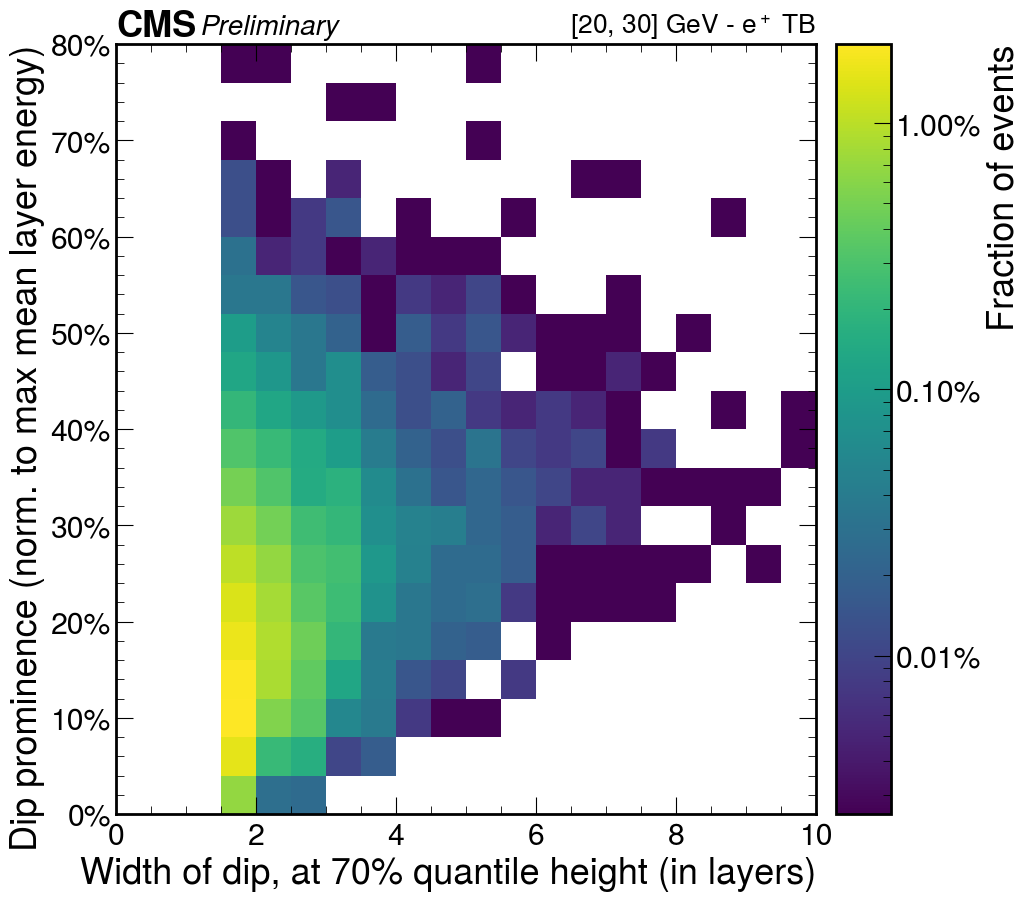

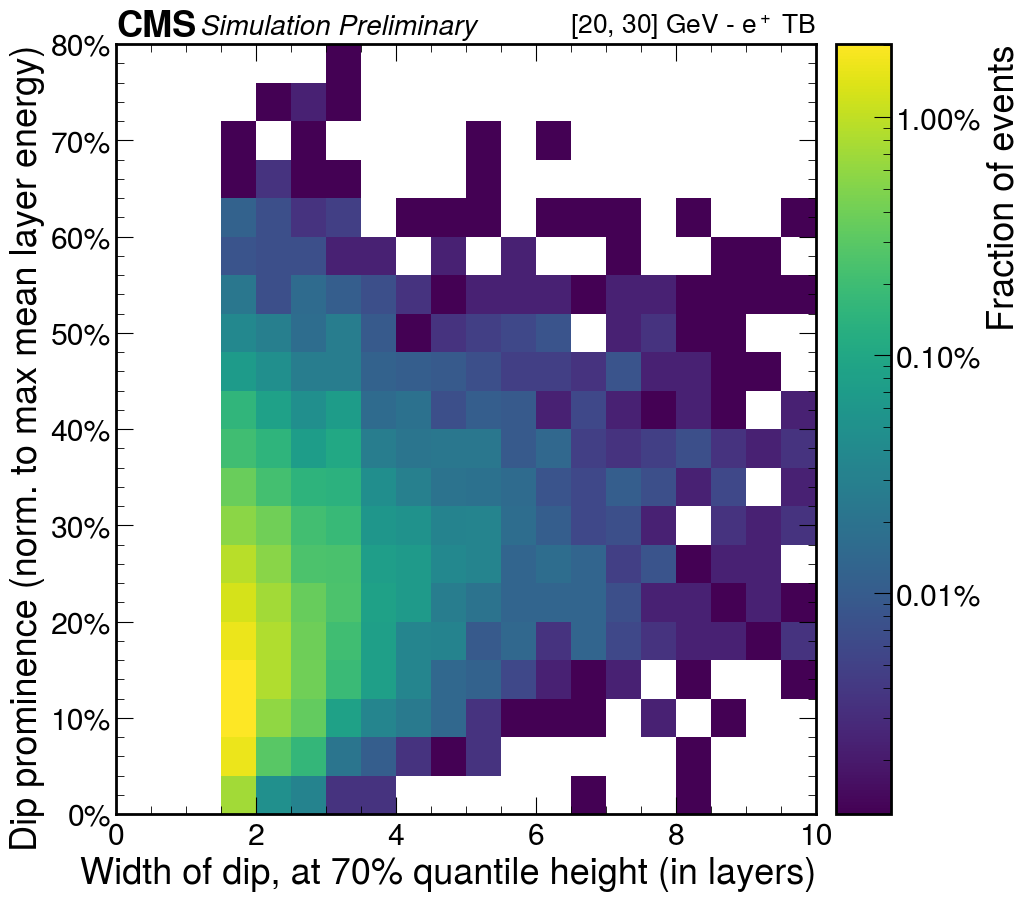

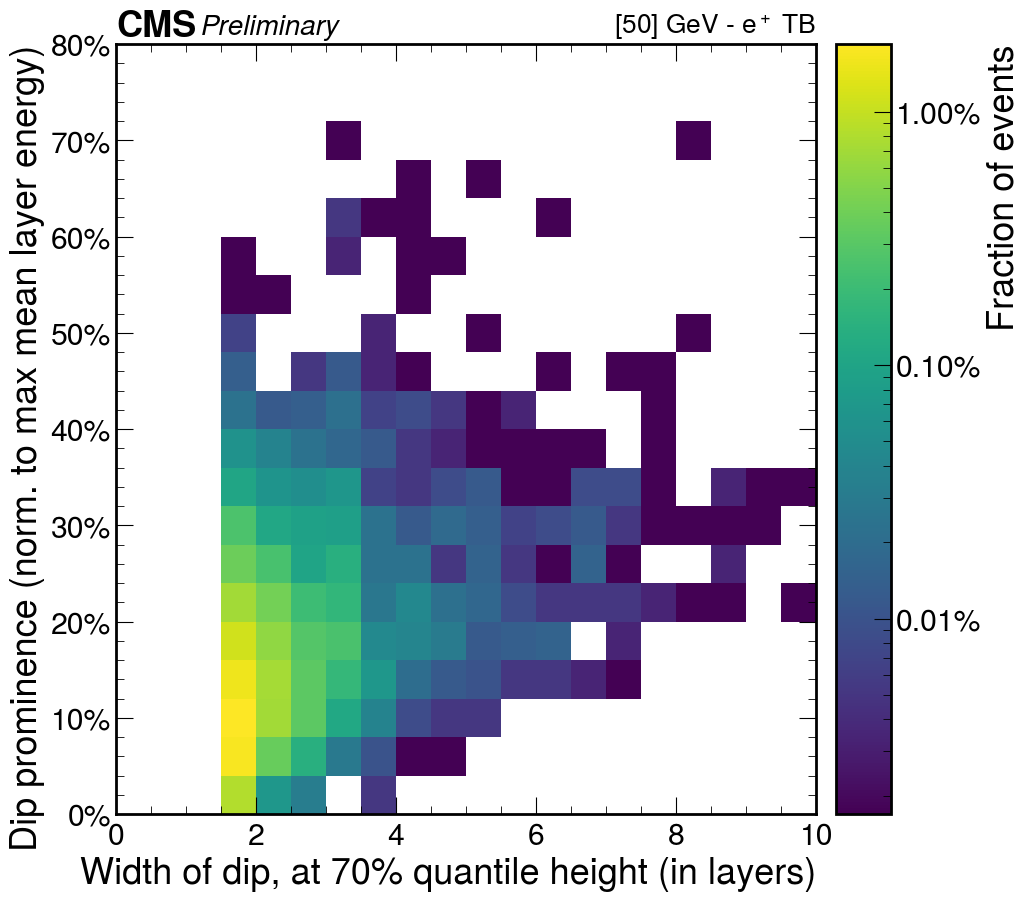

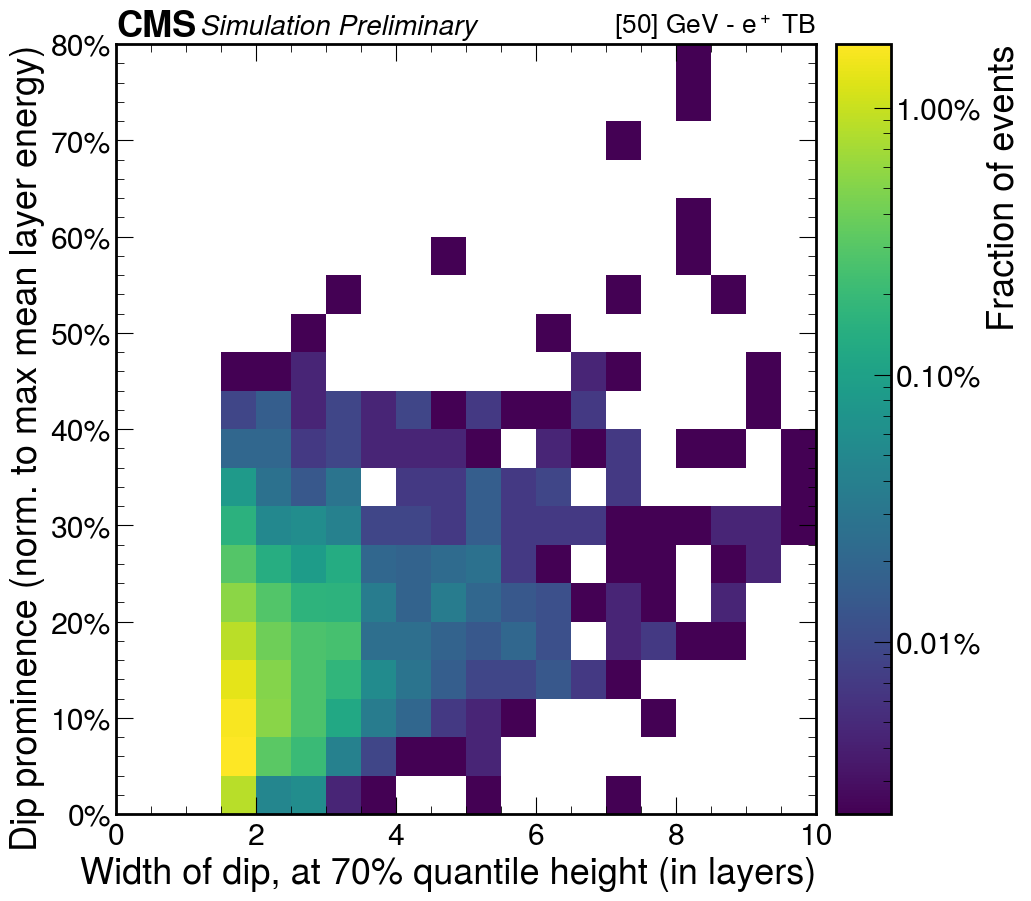

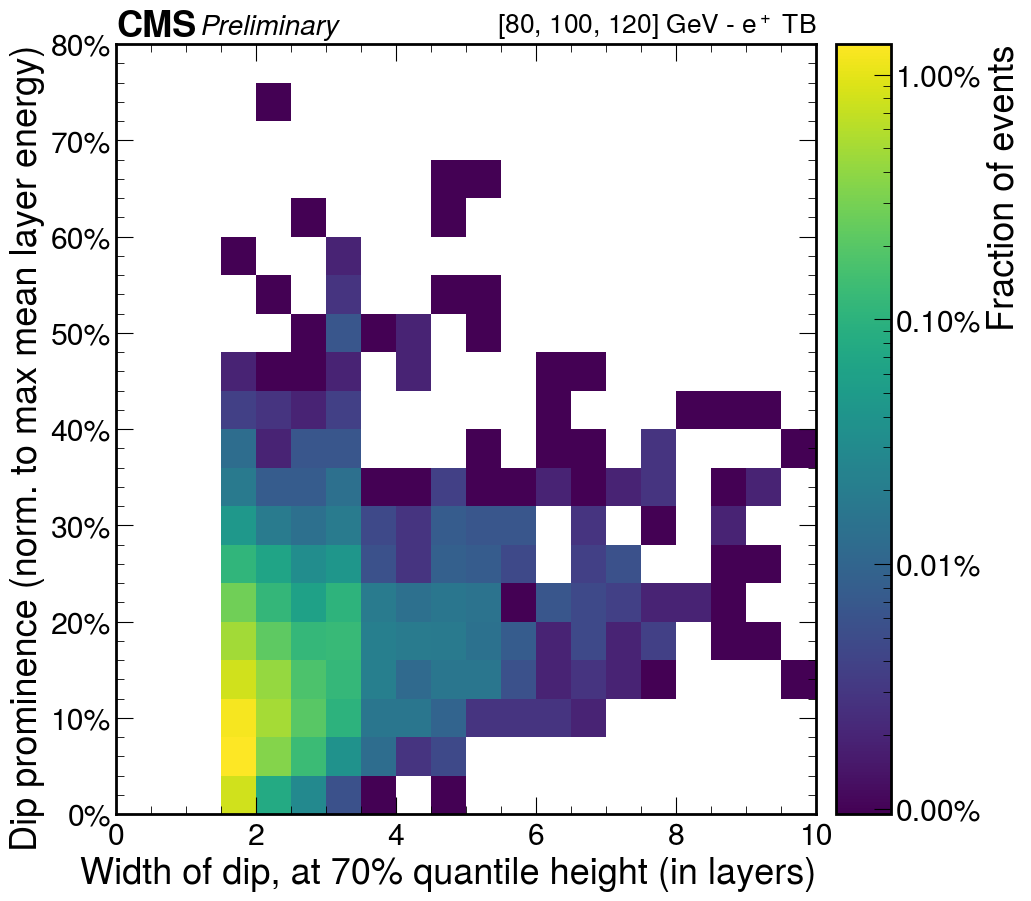

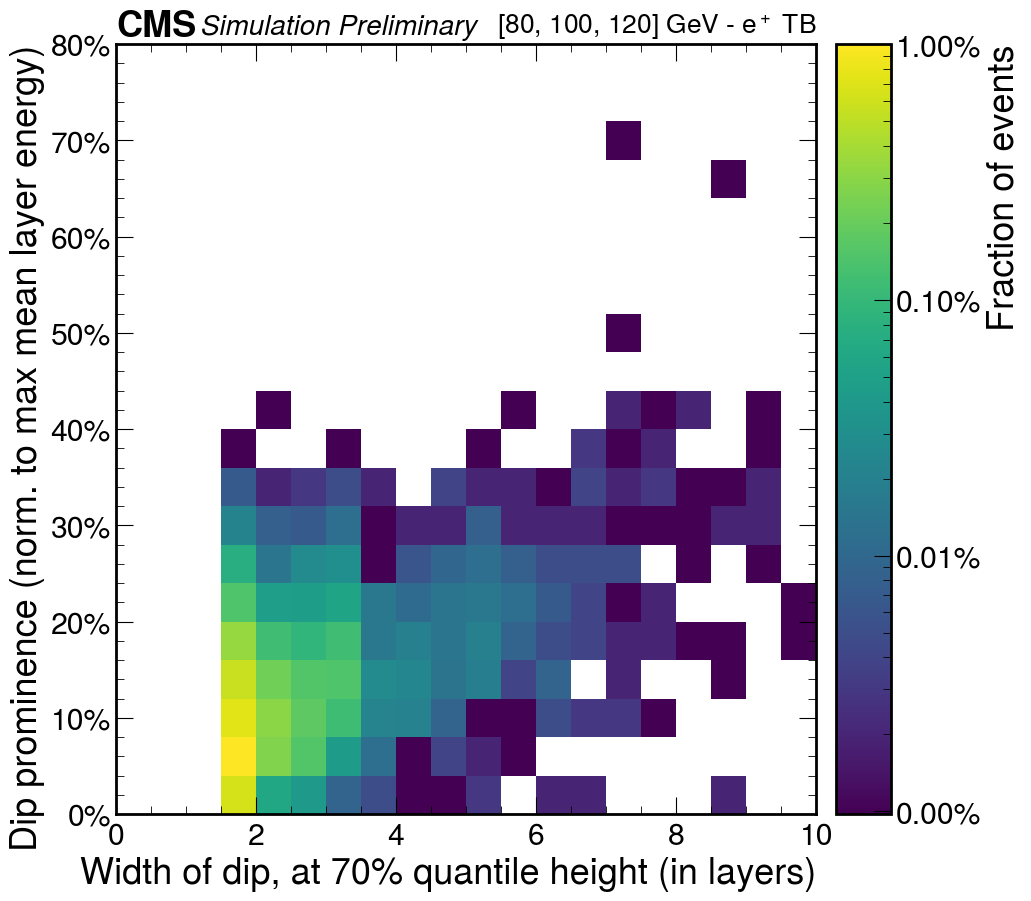

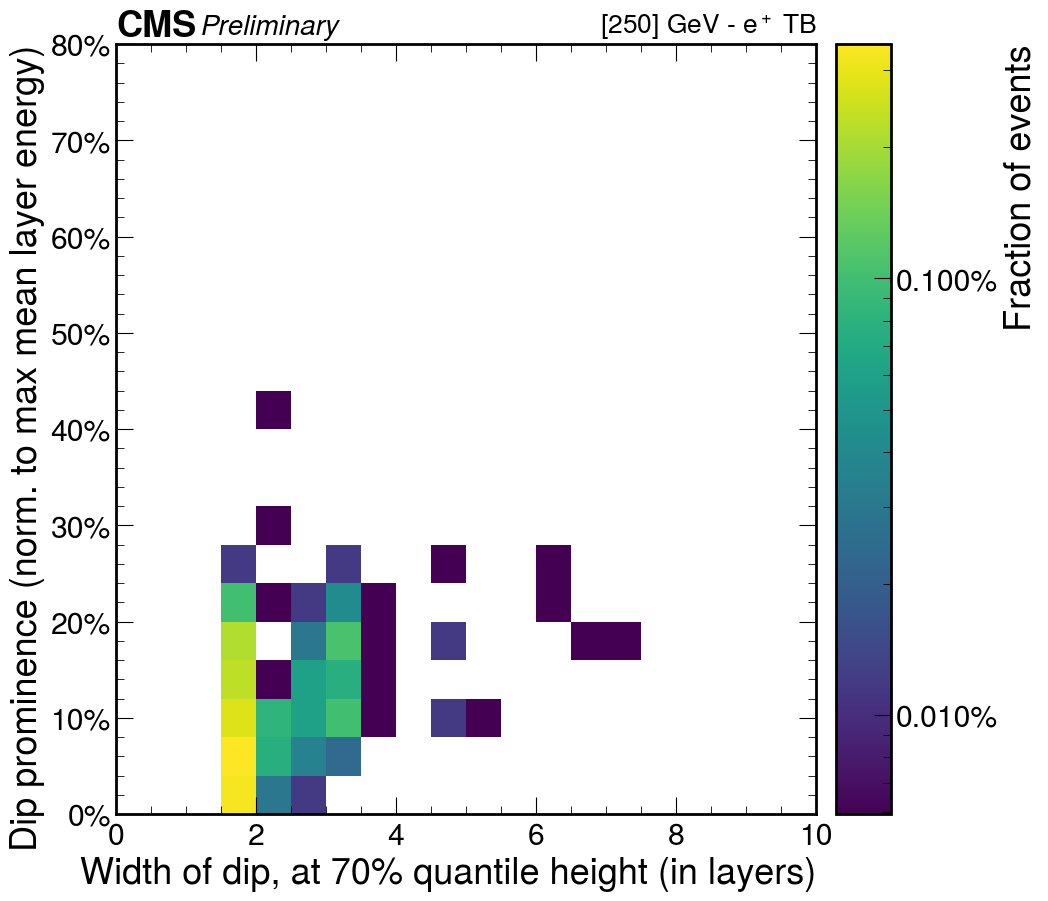

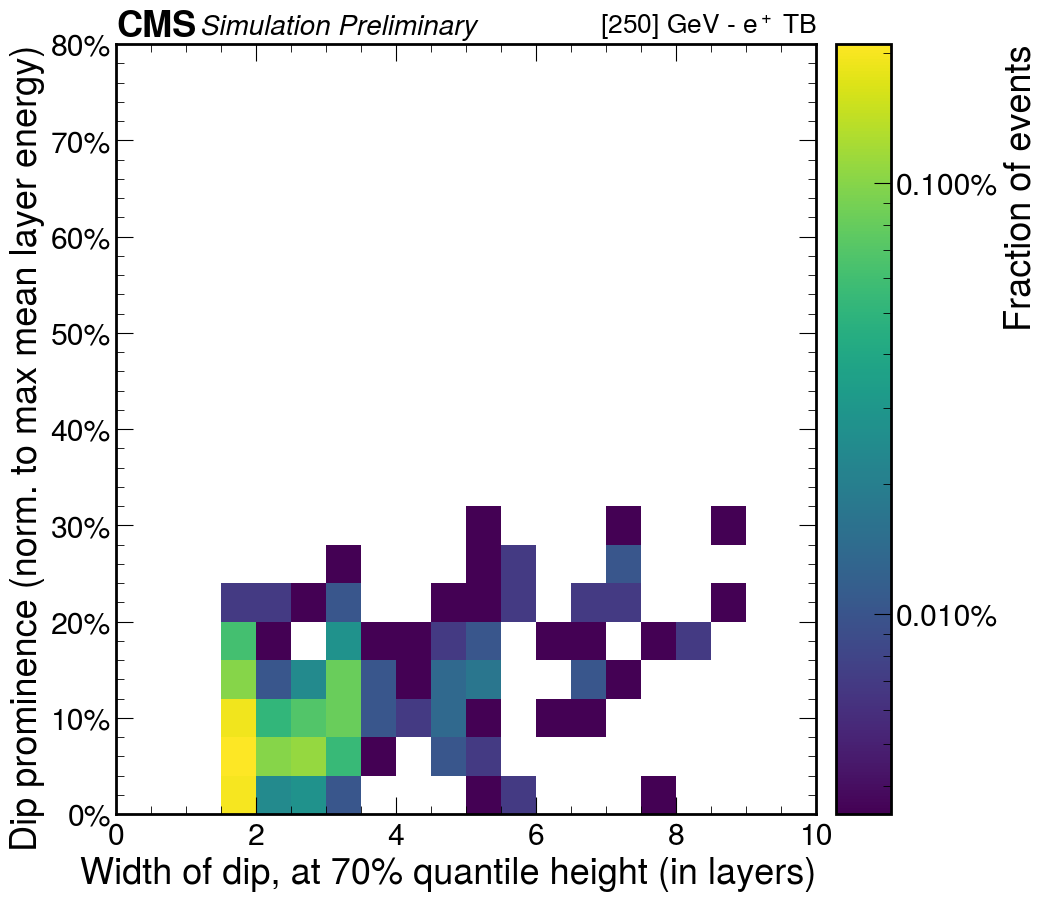

In [6]:
common_kwargs = dict(normalizeEventCount=True, normalizeProminence=True)
for energySetting in plotEnergySettings:
    driver_data.plotHistogram(energySetting, **common_kwargs)
    driver_sim.plotHistogram(energySetting, **common_kwargs)

In [7]:
plt.rcParams["figure.figsize"]

[10.0, 10.0]

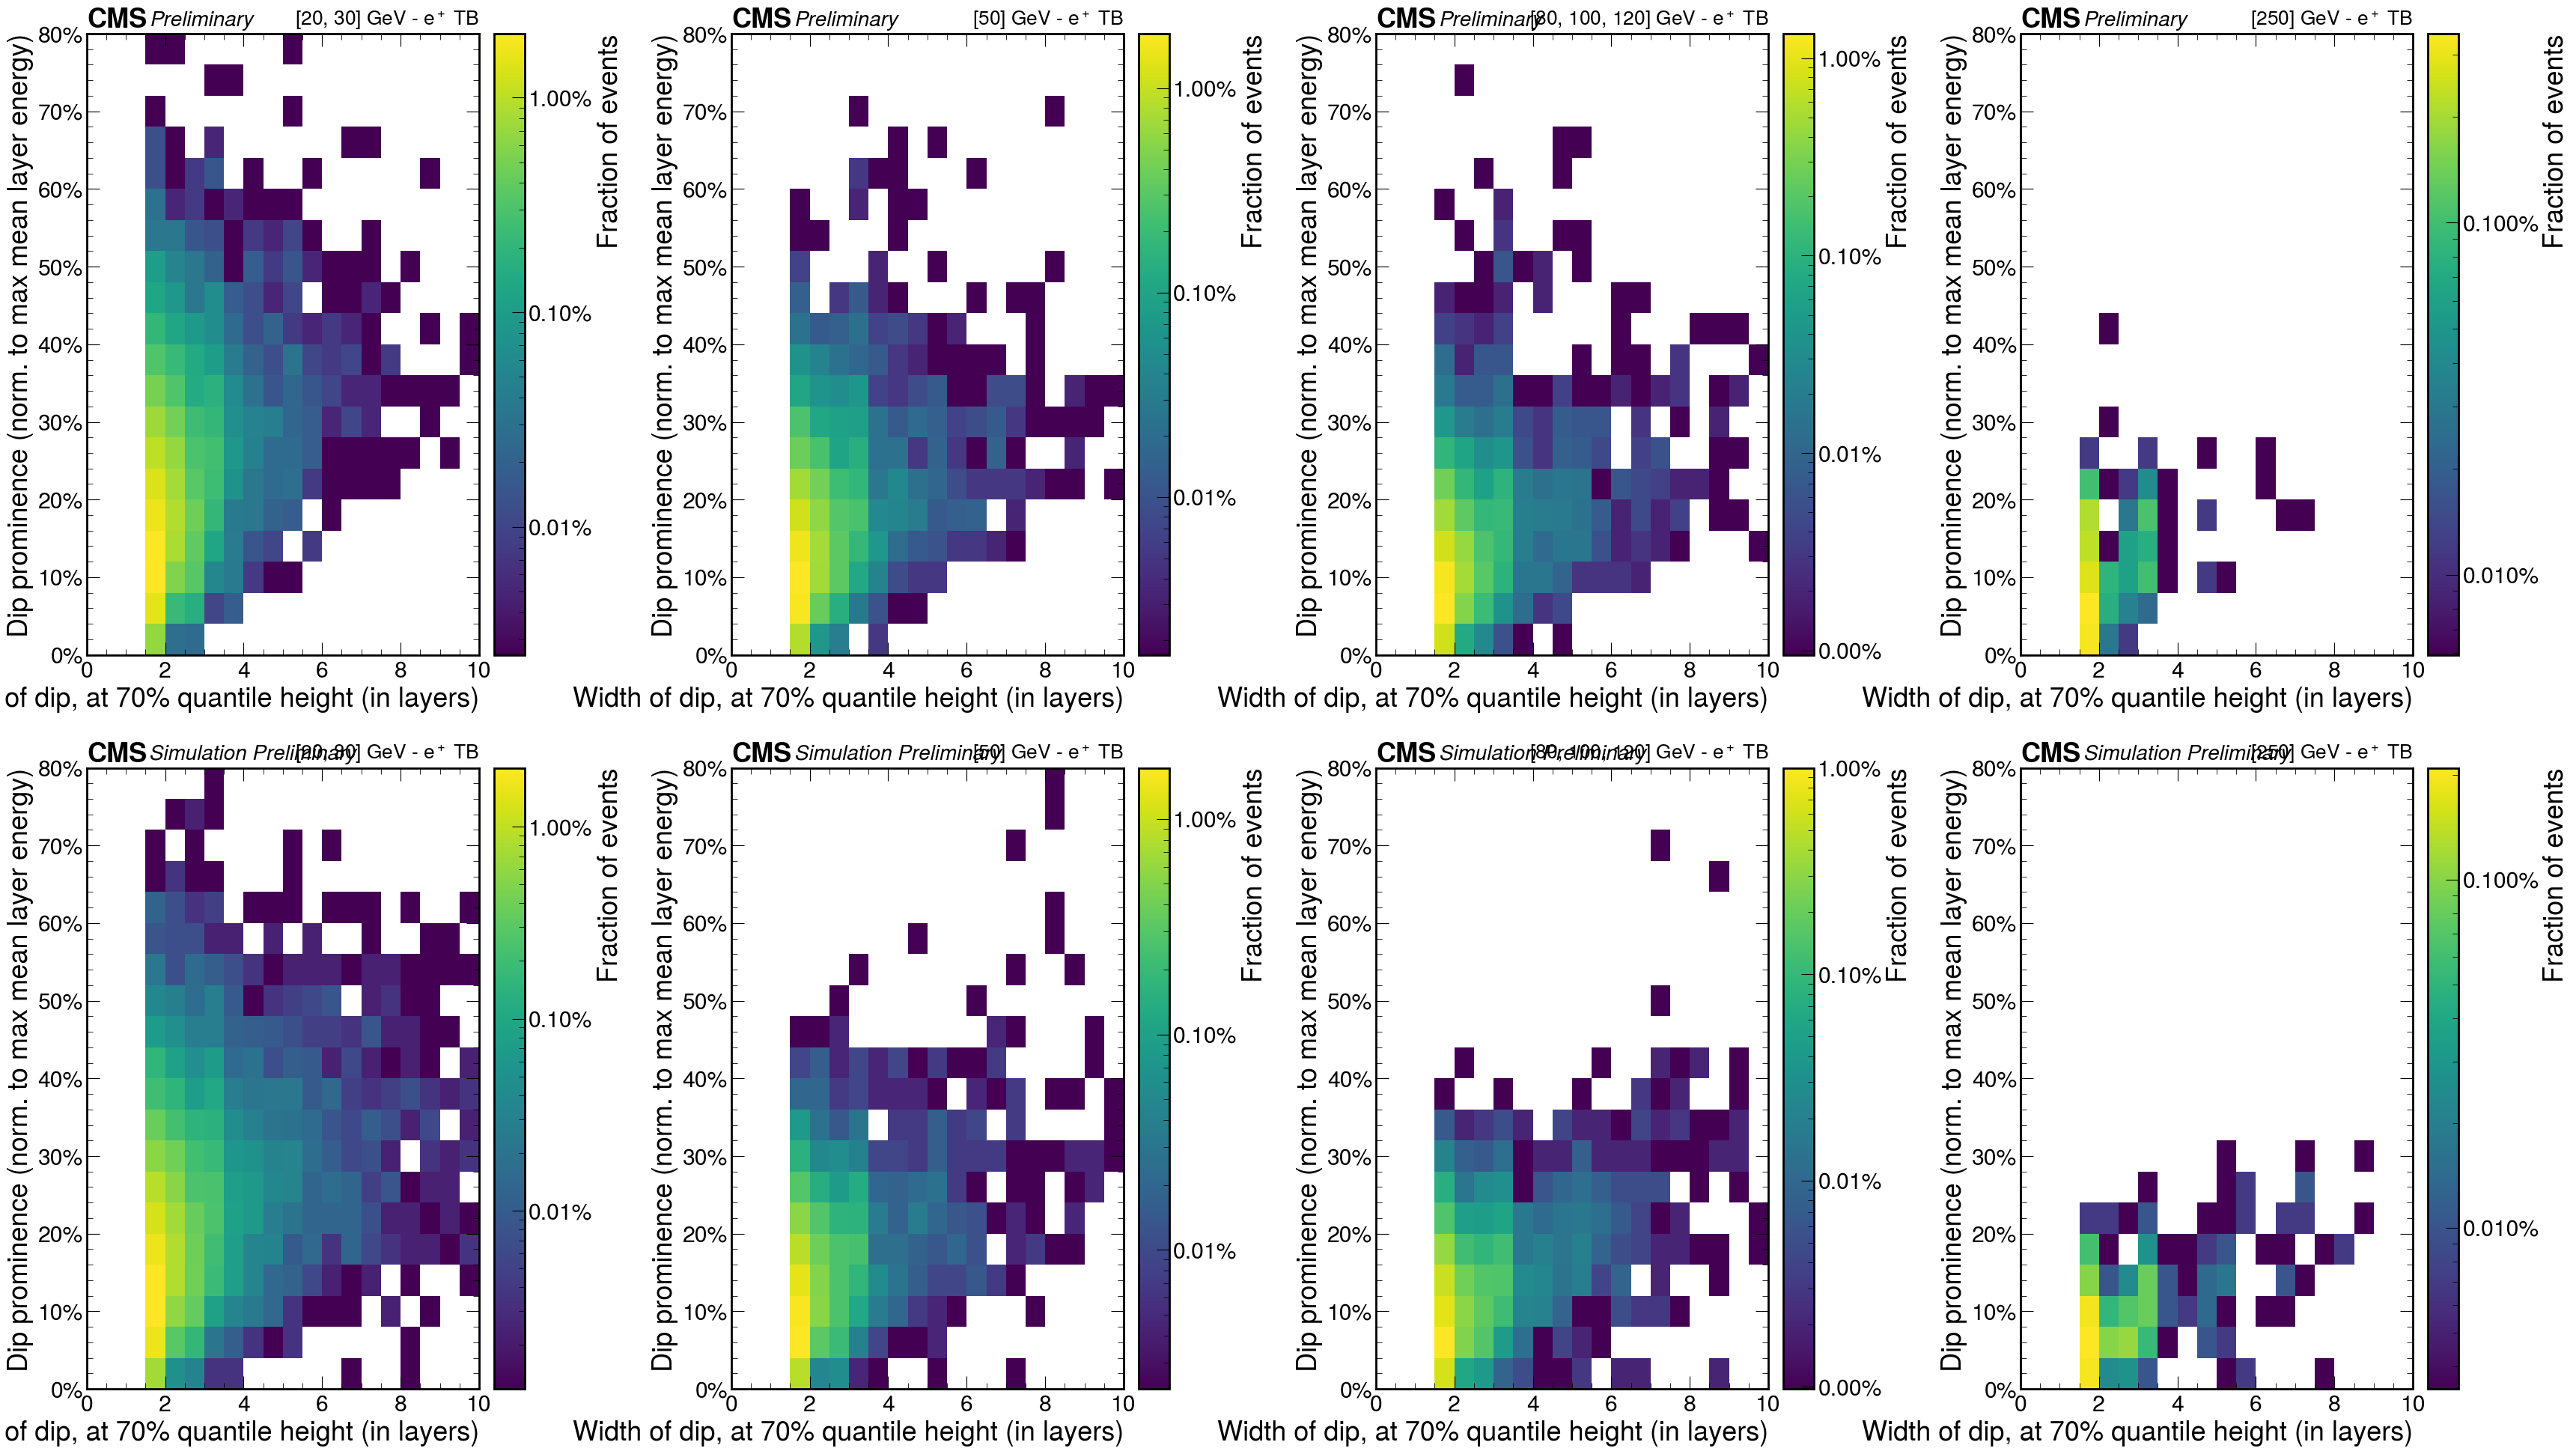

In [8]:
plt.style.use(hep.style.CMS)
figsize_factor = 1
fig, (data_axes, sim_axes) = plt.subplots(2, len(plotEnergySettings), 
    figsize=(10*3.5*figsize_factor, 10*2*figsize_factor),
    #sharex="col", sharey="row"
    )
for energySetting, data_ax, sim_ax in zip(plotEnergySettings, data_axes, sim_axes):
    driver_data.plotHistogram(energySetting, ax=data_ax, **common_kwargs)
    driver_sim.plotHistogram(energySetting, ax=sim_ax, **common_kwargs)
plt.tight_layout()

In [14]:
#eventList = driver_data.getPassingEventList().query("prominences/beamEnergy > .05 and widths > 6 and beamEnergy >= 50")
eventList = driver_data.getPassingEventList().query("prominences > 1.5 and widths > 3 and beamEnergy < 50")
len(eventList)

12

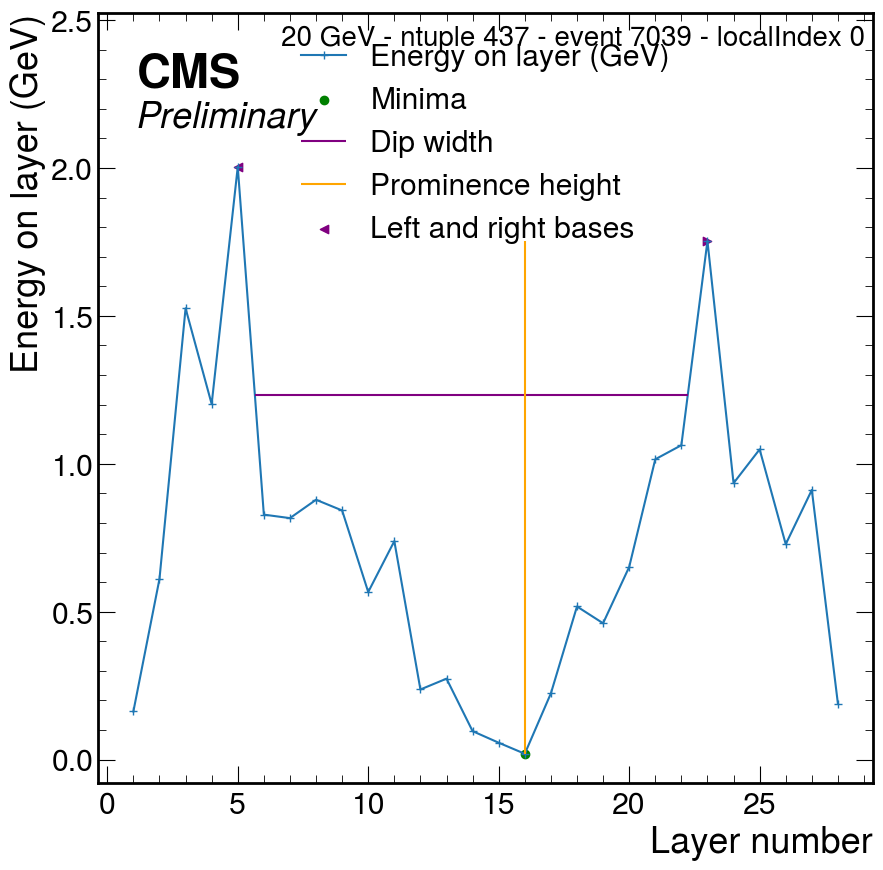

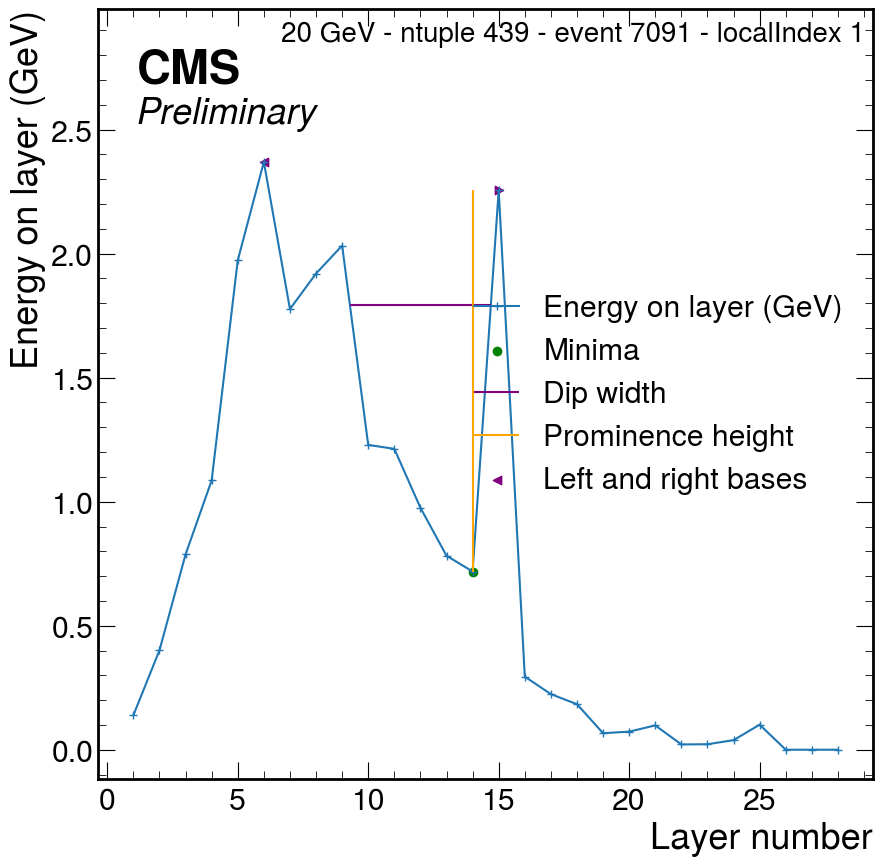

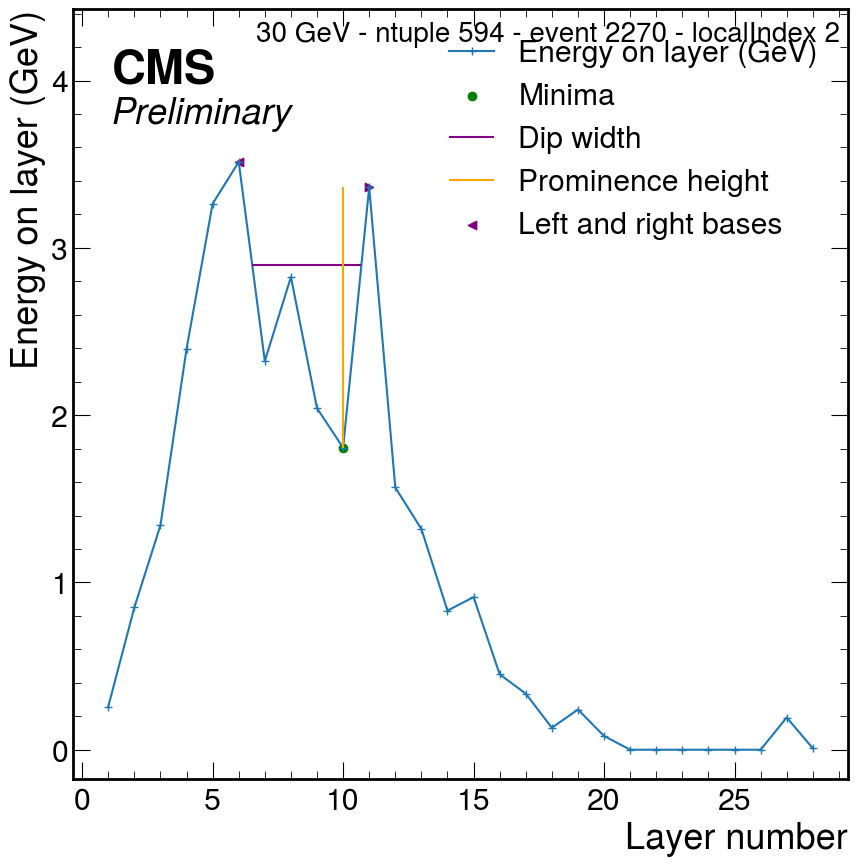

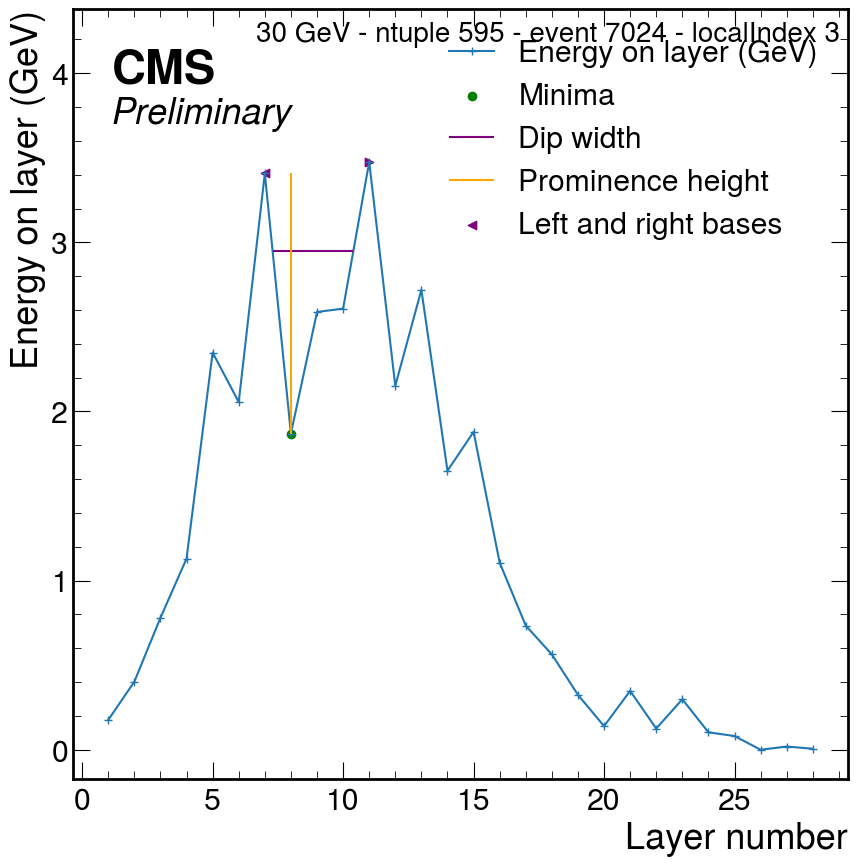

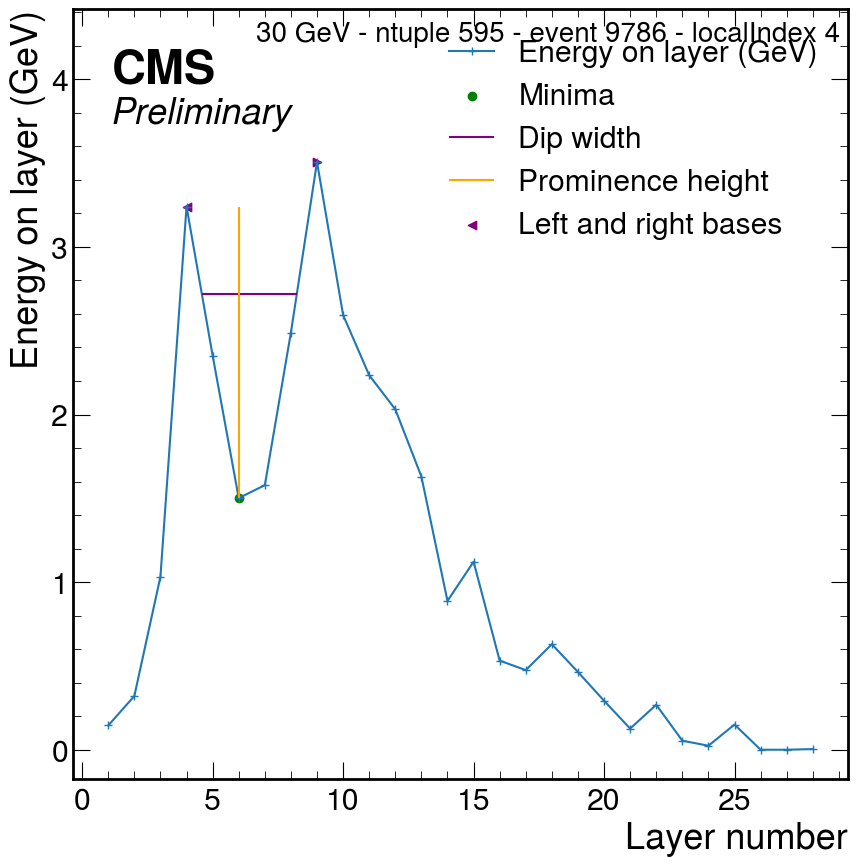

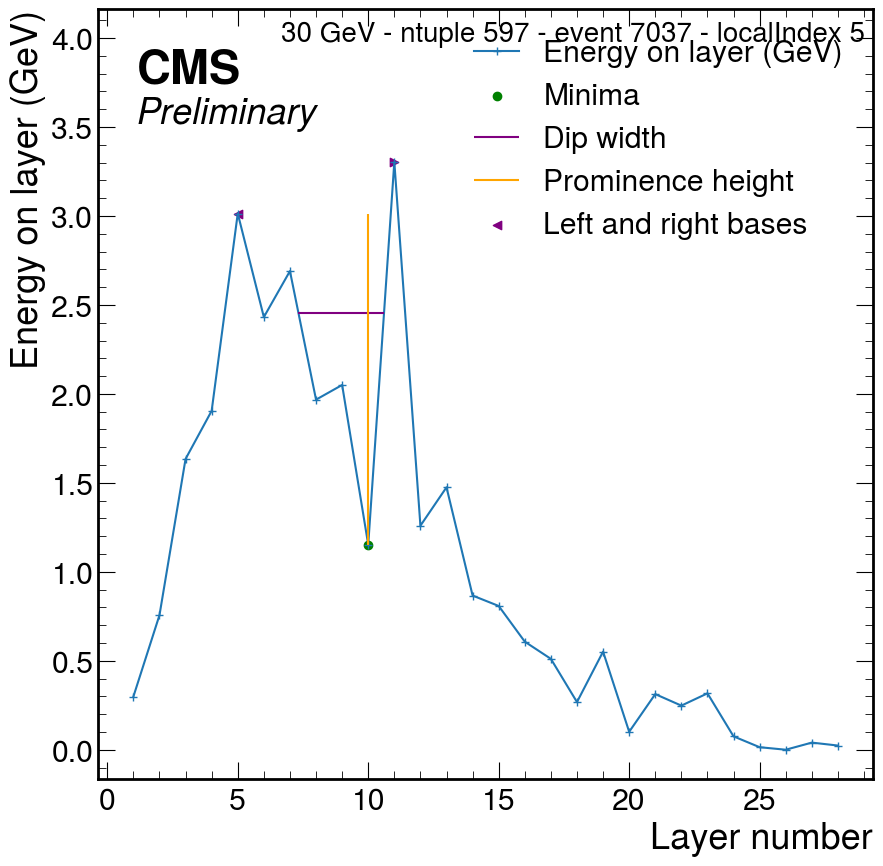

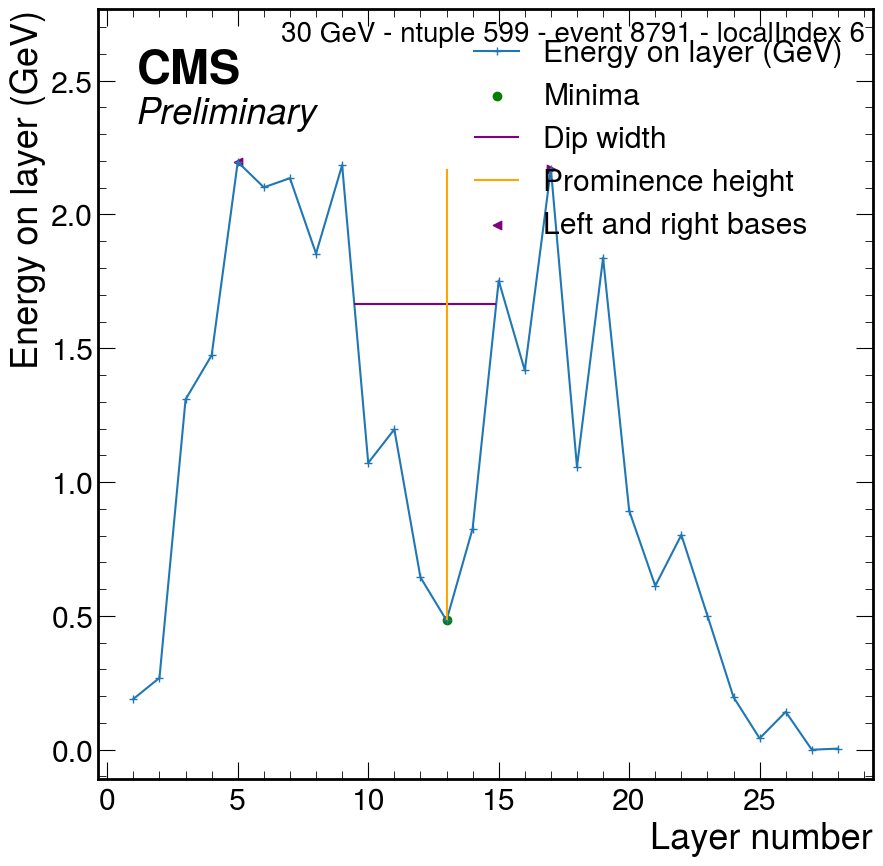

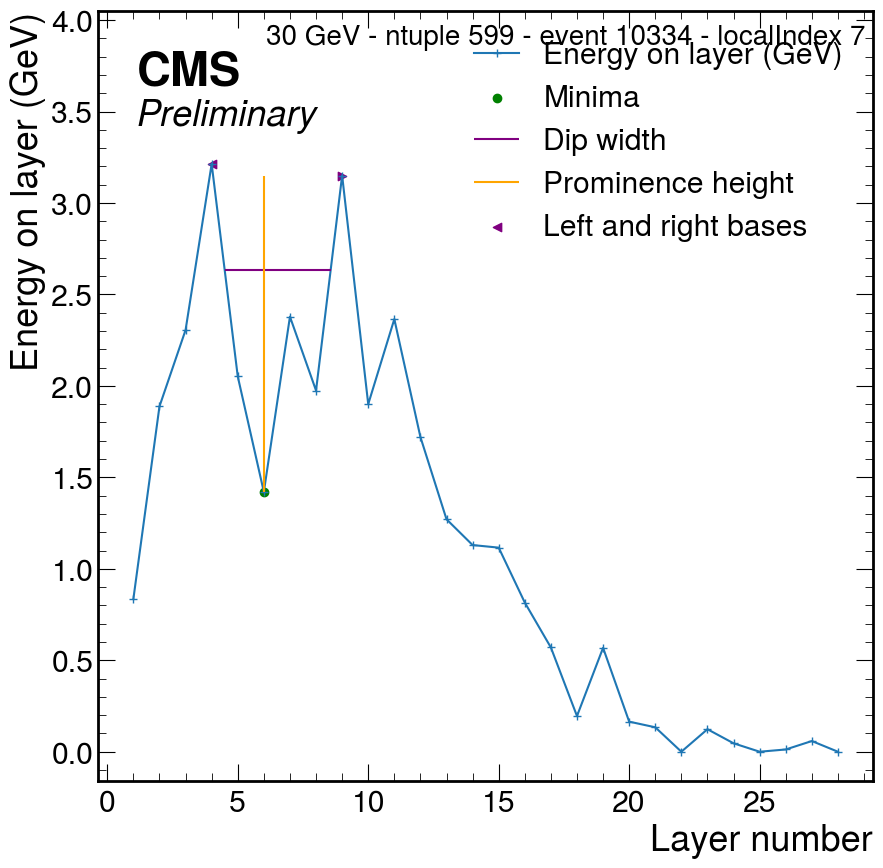

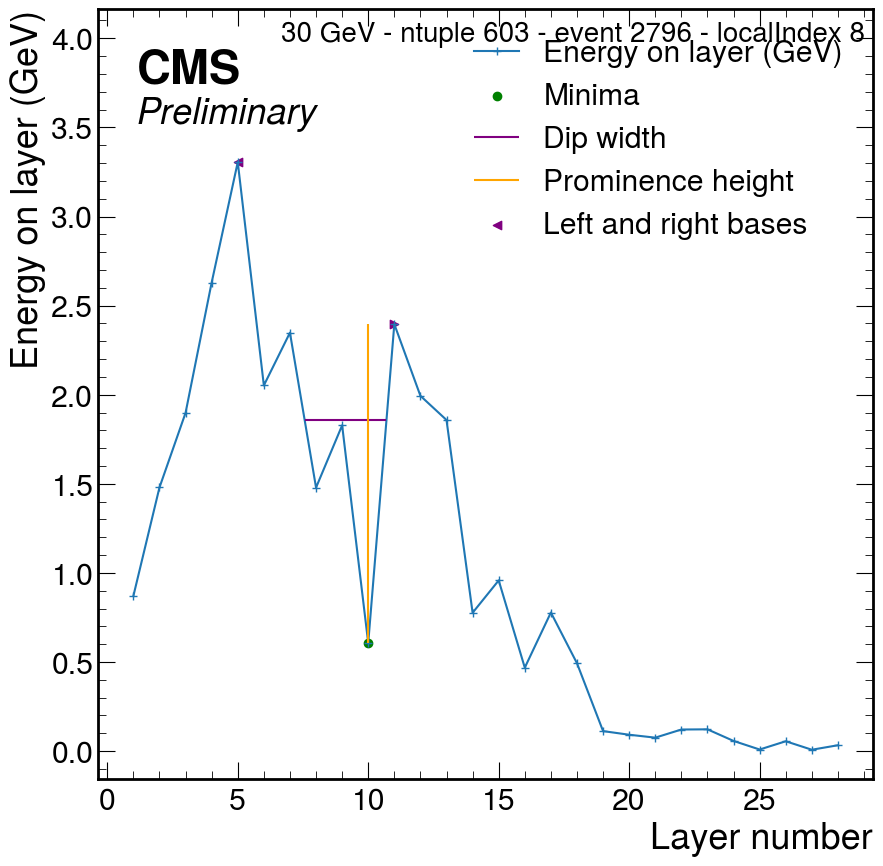

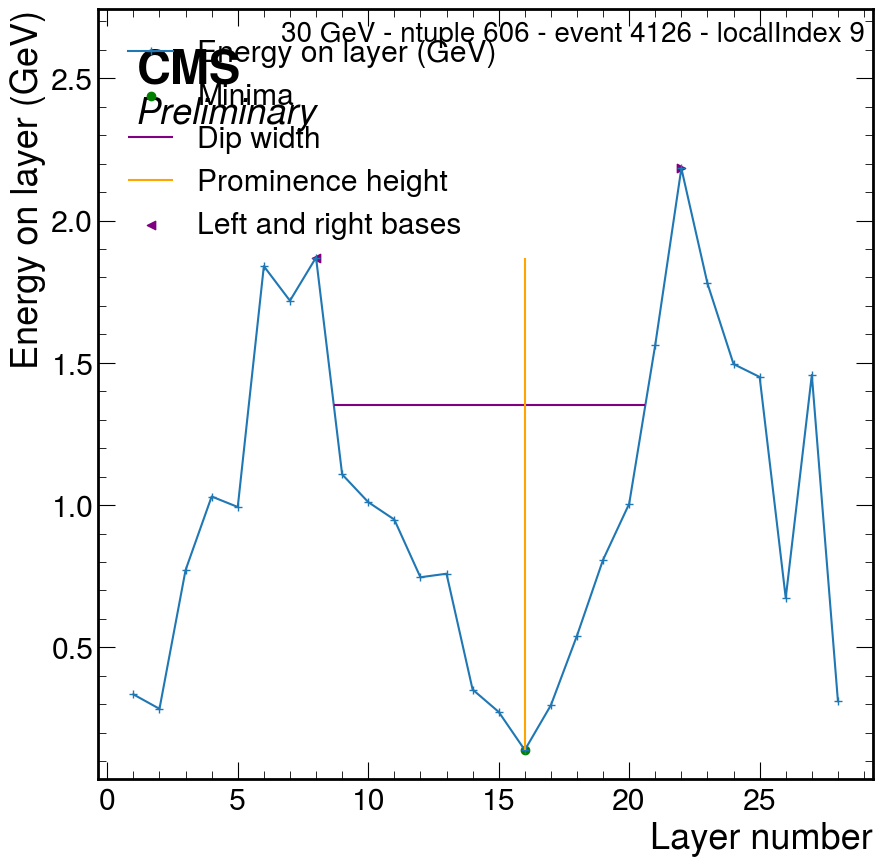

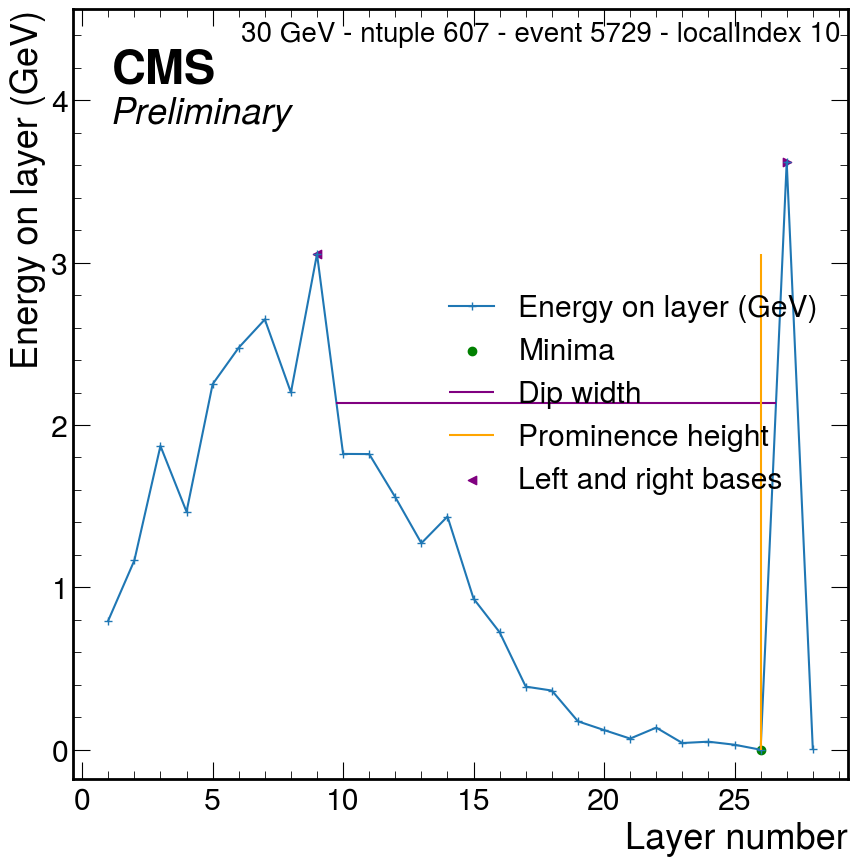

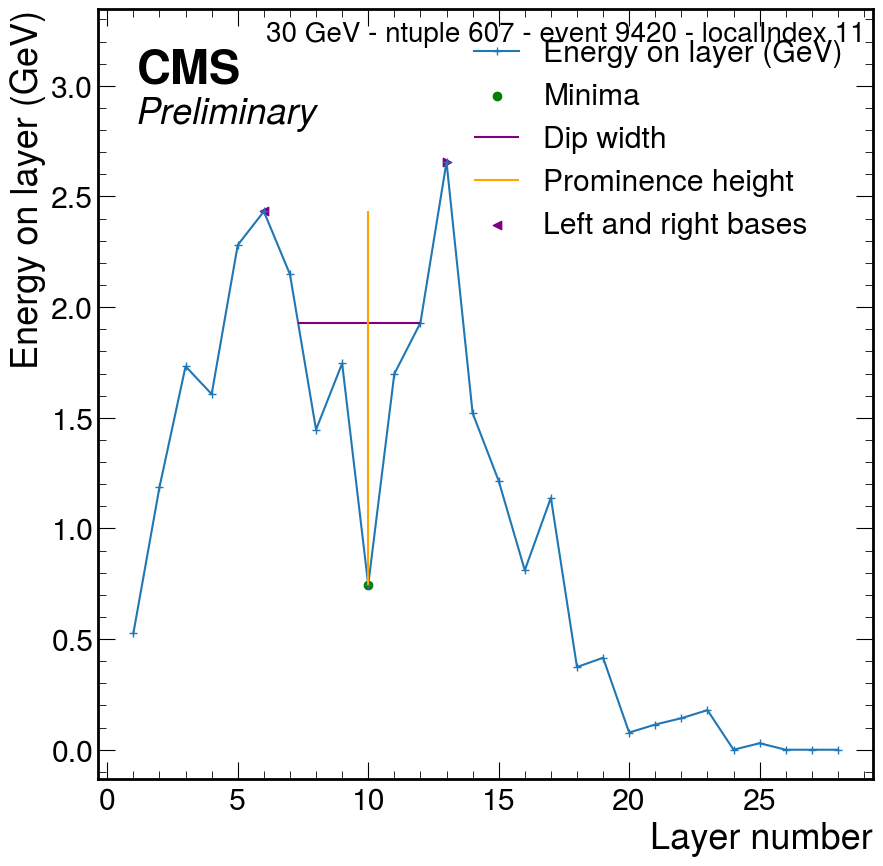

In [10]:
eventList.plotAllLongitudinalProfiles()

In [11]:
# need to forward prot 8050
eventList.setIndex(9)
eventList.plotFullEvent()

Dash is running on http://127.0.0.1:8050/



In [19]:
oppositeEventList = driver_data.getPassingEventList().query("prominences < 1.5 and widths < 2 and beamEnergy == 300")
len(oppositeEventList)

13

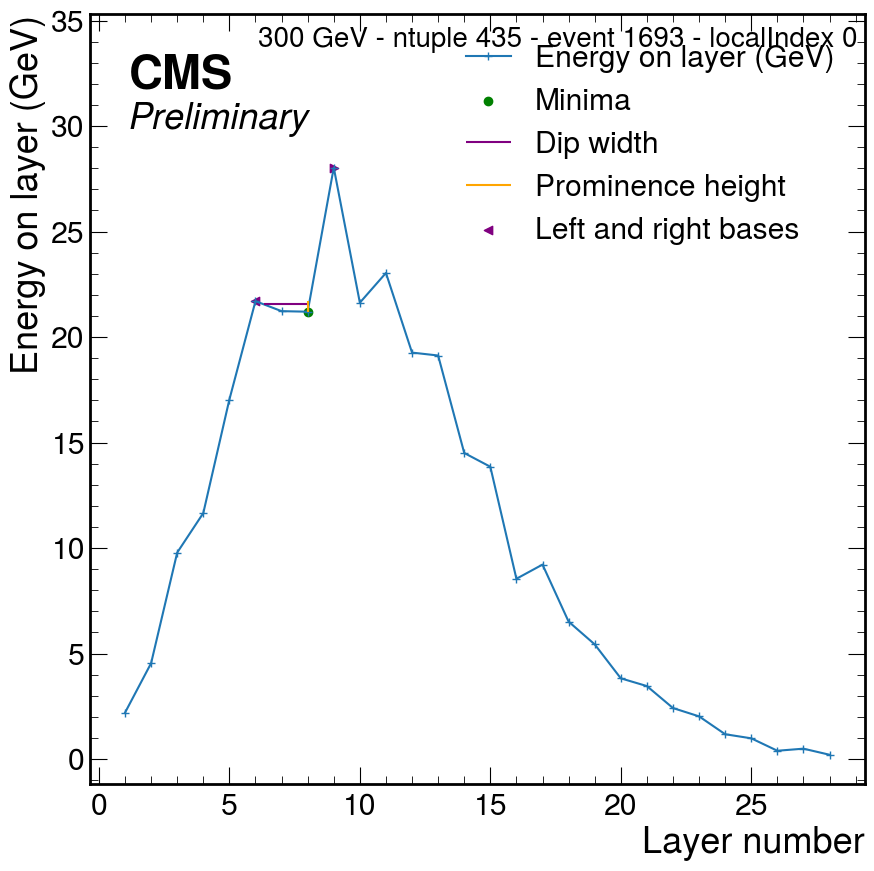

In [20]:
oppositeEventList.plotLongitudinalProfile()